In [92]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.statistics import SummaryStatistics, CloneComparison
from modules.figures import ControlComparison, ChannelComparison

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [93]:
# load data
data_path = '../data/clean_data.json'
with open(data_path, 'r') as f:
    all_data = pd.read_json(f)
df = all_data[all_data.genotype.isin((0,1,2))]        

# filter cells
print('before', len(df))
df = df[df.near_furrow==True]
df = df[~df.boundary]
df = df[df.concurrent_all]
print('after', len(df))

#resampled = resample_df(df)

before 100394
after 13539


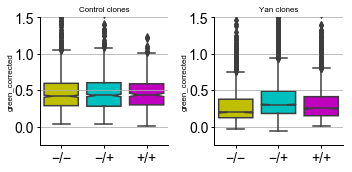

In [32]:
fig = ControlComparison(df, mode='box', grid=True, labelsize=14, figsize=(5, 2.5), ymin=-0.25, ymax=1.5)

In [94]:
_ = SummaryStatistics(df)

TEST: MW
Control: 0x vs 1x: 0.9063
Control: 1x vs 2x: 0.7506
Mutant: 0x vs 1x: 0.0000
Mutant: 1x vs 2x: 0.0000


In [36]:
# pairwise comparisons
# fig = CloneComparison(df, 'perturbation', 'm', 'h').plot()
# fig = CloneComparison(df, 'perturbation', 'h', 'w').plot()

In [87]:
# individual discs

# import seaborn as sns
# exp = df[df.experiment=='perturbation']
# gb = exp.groupby(by=('disc_id'))
# nlayers = len(gb.indices)
# nrows = (nlayers // 5)+1
# fig, axes = plt.subplots(nrows=nrows, ncols=5, figsize=(13, nrows*2.5))
# for i, ind in enumerate(gb.indices.values()):
#     ax = axes.ravel()[i]
#     cells = exp.iloc[ind]
    
#     sns.boxplot(x='genotype', y='green_corrected', data=cells, order=(0,1,2),  ax=ax)
#     #sns.violinplot(x='genotype', y='green_corrected', data=cells, order=(0,1,2),  ax=ax)
    
#     disc_id = cells.disc_id.unique()[0]
#     ax.set_title('Disc {}'.format(disc_id))
#     ax.set_ylim(0, 1.5)
    
# plt.tight_layout()

# Comparison figures

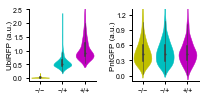

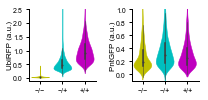

In [95]:
control = df[df.experiment=='control']
control_comparison = ChannelComparison(control, cut=1, name='control_comparison')
ax0, ax1 = control_comparison.fig.axes
ax0.set_ylim(-0.1, 2.5)
ax1.set_ylim(-0.1, 1.3)
ax0.set_yticks(np.arange(0, 2.5+.1, .5))
ax1.set_yticks(np.arange(0, 1.4+.1, .3))
plt.tight_layout()

perturbation = df[df.experiment=='perturbation']
perturbation_comparison = ChannelComparison(perturbation, cut=1, name='perturbation_comparison')
ax0, ax1 = perturbation_comparison.fig.axes
ax0.set_ylim(-0.1, 2.5)
ax1.set_ylim(-0.1, 1.)
ax0.set_yticks(np.arange(0, 2.5+.1, .5))
ax1.set_yticks(np.arange(0, 1+.1, .2))
plt.tight_layout()

control_comparison.save()
perturbation_comparison.save()

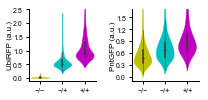

In [104]:
control_comparison_raw = ChannelComparison(control, cut=1, name='control_raw_comparison')
plt.close()
control_comparison_raw.y1 = 'green'
control_comparison_raw.compile(control, cut=1)

ax0, ax1 = control_comparison_raw.fig.axes
ax0.set_ylim(-0.1, 2.5)
ax1.set_ylim(-0.1, 1.7)
ax0.set_yticks(np.arange(0, 2.5+.1, .5))
ax1.set_yticks(np.arange(0, 1.7+.1, .3))
plt.tight_layout()

control_comparison_raw.save()